In [ ]:
import tweepy
import json


ACCESS_TOKEN='1150634618996973570-eAToZWStX6uGULmN3r3S6nksvix6kV'
ACCESS_SECRET='uZxvR7YZp8J277Abosjc3acnq6km4OjpaM4Mvqf7E4o5H'
CONSUMER_KEY='4IHysd7AcfDV2QheV05uiYDH1'
CONSUMER_SECRET='e5Tl6T6LLntN3zJJp4cX1BVroBU4qg4dEHGJa91JTfbnypCQAT'

auth=tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

class MyListener(tweepy.StreamListener):
    def on_data(self, data):
        try:
            with open('ynwa2.json', 'a') as f:                
                f.write(data)
                return True
            
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True
 
    def on_error(self, status):
        print(status)
        return True

l = MyListener()
    
twitter_stream = tweepy.Stream(auth, l)
twitter_stream.filter(track=['#YNWA'])

In [6]:
import json

with open ('ynwa2.json','r') as f:
    line = f.readline() # read only the firsr tweet/line
    tweet = json.loads (line) # load it as python dict
    print (json.dumps (tweet,indent = 4)) #pretty-print

{
    "created_at": "Thu Aug 15 02:19:44 +0000 2019",
    "id": 1161824766099017728,
    "id_str": "1161824766099017728",
    "text": "RT @luchogarcia14: Tonight, Liverpool will be back to the UEFA Super Cup in Istanbul. A chance to keep the momentum going an bring more sil\u2026",
    "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>",
    "truncated": false,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_reply_to_user_id_str": null,
    "in_reply_to_screen_name": null,
    "user": {
        "id": 452830754,
        "id_str": "452830754",
        "name": "20.30",
        "screen_name": "raemundo_o",
        "location": "thailand",
        "url": null,
        "description": "Why's pumpkin? \ud83d\ude11",
        "translator_type": "none",
        "protected": false,
        "verified": false,
        "followers_count": 116,
        "friends_count": 231,
        "listed_c

In [4]:
from nltk.tokenize import word_tokenize
 
tweet = 'RT @marcobonzanini: just an example! :D http://example.com #NLP'
print(word_tokenize(tweet))

['RT', '@', 'marcobonzanini', ':', 'just', 'an', 'example', '!', ':', 'D', 'http', ':', '//example.com', '#', 'NLP']


In [8]:
import re
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]

tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens
 
tweet = 'RT @marcobonzanini: just an example! :D http://example.com #NLP'
print(preprocess(tweet))
# ['RT', '@marcobonzanini', ':', 'just', 'an', 'example', '!', ':D', 'http://example.com', '#NLP']

['RT', '@marcobonzanini', ':', 'just', 'an', 'example', '!', ':D', 'http://example.com', '#NLP']


In [11]:
with open('ynwa2.json', 'r', newline='\r\n') as f:
    for line in f:
        tweet = json.loads(line)
        tokens = preprocess(tweet['text'])
        print(tokens)

['RT', '@luchogarcia14', ':', 'Tonight', ',', 'Liverpool', 'will', 'be', 'back', 'to', 'the', 'UEFA', 'Super', 'Cup', 'in', 'Istanbul', '.', 'A', 'chance', 'to', 'keep', 'the', 'momentum', 'going', 'an', 'bring', 'more', 'sil', '…']
['had', 'an', 'amazing', 'dinner', 'yesterday', 'at', "'", 'De', '.', 'Wan', '1958', 'by', 'Chef', 'Wan', "'", '.', 'The', 'food', 'is', '10', '/', '10', '!', 'and', 'not', 'to', 'forget', ',', '#YNWA', 'to', 'al', '…', 'https://t.co/eIWpGAuCrP']
['RT', '@faizal_tahir', ':', 'And', 'of', 'course', ',', 'congratulations', 'to', '@LFC', 'for', 'our', 'second', 'trophy', 'under', 'Klopp', 'this', 'year', '!', '!', 'Let', '’', 's', 'keep', 'on', 'adding', 'to', 'that', '!', 'Great', '…']
['https://t.co/phhgtJLiyP', 'Hit', 'Em', 'Up', 'Official', 'Video', '#youtube', '#tupac', '#indiana', '#chicago', '#video', '#music', '#unsigned', '…', 'https://t.co/BOMrbnHzjS']
['RT', '@TheKop_com', ':', '🎶', 'You', '’', 'll', 'Never', 'Walk', 'Alone', '🎶', '.', '#LFC', '#YNW

['RT', '@koptaish', ':', 'スーパーカップ優勝', '！', '！', '！', 'やったぜー', '(', '*', '≧', '∇', '≦', ')', 'ﾉ', '🏆', '色々振り返るのはまた後で', '。', 'なにせ全部終わったの夜中の２時過ぎ', '！', 'UEFA', 'の阿呆が', '！', 'キックオフ22時って何やねん', '！', '何でも西ヨーロッパ時間に合わせるな', '！', '#LFC', '#YNWA', '#Superc', '…']
['RT', '@GWijnaldum', ':', 'Yes', '!', '🔥', 'That', '’', 's', 'one', 'for', 'the', 'Champions', 'Wall', '🏆', 'A', 'tough', 'battle', ',', 'but', 'this', 'team', 'can', 'overcome', 'anything', '🙌', '🏾', 'Massive', 'thanks', 'to', 'all', 'the', '…']
['Ya', 'mo', 'gimana', 'lagi', 'ya', '.', '.', '.', '.', '#YNWA']
['Mira', 'lo', 'que', 'descubr', 'í', '(', '+', '18', ')', 'https://t.co/qfY1PCCeue', '#EmilioOsorio', '#YNWA', '#Chelsea', 'https://t.co/msr5yd6uD4']
['RT', '@LFCBrasil', ':', 'Joga', 'demais', '.', 'Parab', 'éns', ',', '@_fabinhotavares', '!', '💪', '👊', 'https://t.co/LnAyW7qN6M']
['RT', '@GWijnaldum', ':', 'Yes', '!', '🔥', 'That', '’', 's', 'one', 'for', 'the', 'Champions', 'Wall', '🏆', 'A', 'tough', 'battle', ',', 'but', 'this'

In [21]:
import operator 
import json
from collections import Counter
 
fname = 'ynwa2.json'
with open(fname, 'r', newline='\r\n') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_all = [term for term in preprocess(tweet['text'])]
        # Update the counter
        count_all.update(terms_all)
    # Print the first 5 most frequent words
    print(count_all.most_common(20))

[('.', 451), (':', 339), ('RT', 314), ('#YNWA', 304), ('!', 230), ('…', 227), ('to', 165), ('the', 154), (',', 153), ('🏆', 137), ('this', 133), ('🔴', 105), ('’', 92), ('for', 91), ('！', 86), ('🔥', 71), ('win', 70), ('another', 69), ('is', 68), ('A', 65)]


In [41]:
from nltk.corpus import stopwords
import string
 
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via', 'RT', '“',  '”', '’', 'IS', 'S']
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [42]:
terms_stop = [term for term in preprocess(tweet['text']) if term not in stop]
print(terms_stop)

['@SamanthaQuek', '🤣', '🤣', '🤣', 'THIS', 'MADE', 'MY', 'NIGHT', 'EVEN', 'MORE', 'ADRI', 'ÁN', 'KLOPP', 'BONKERS', '😂', 'BUT', 'HE', 'LIVERPOOL', 'BONKERS', 'LOVE', 'HIM', '😂', '😍', '#LFC', '#YNWA', '#LI', '…']


In [44]:
# Count terms only once, equivalent to Document Frequency
terms_single = set(terms_all)
# Count hashtags only
terms_hash = [term for term in preprocess(tweet['text']) 
              if term.startswith('#')]
# Count terms only (no hashtags, no mentions)
terms_only = [term for term in preprocess(tweet['text']) 
              if term not in stop and
              not term.startswith(('#', '@'))] 
              # mind the ((double brackets))
              # startswith() takes a tuple (not a list) if 
              # we pass a list of inputs
            
print(terms_only)

['🤣', '🤣', '🤣', 'THIS', 'MADE', 'MY', 'NIGHT', 'EVEN', 'MORE', 'ADRI', 'ÁN', 'KLOPP', 'BONKERS', '😂', 'BUT', 'HE', 'LIVERPOOL', 'BONKERS', 'LOVE', 'HIM', '😂', '😍', '…']


In [48]:
from nltk import bigrams 
 
terms_bigram = bigrams(terms_stop)
terms_bigram = [list(bigrams(terms_only)) for tweet in terms_only]

print(terms_bigram)

[[('🤣', '🤣'), ('🤣', '🤣'), ('🤣', 'THIS'), ('THIS', 'MADE'), ('MADE', 'MY'), ('MY', 'NIGHT'), ('NIGHT', 'EVEN'), ('EVEN', 'MORE'), ('MORE', 'ADRI'), ('ADRI', 'ÁN'), ('ÁN', 'KLOPP'), ('KLOPP', 'BONKERS'), ('BONKERS', '😂'), ('😂', 'BUT'), ('BUT', 'HE'), ('HE', 'LIVERPOOL'), ('LIVERPOOL', 'BONKERS'), ('BONKERS', 'LOVE'), ('LOVE', 'HIM'), ('HIM', '😂'), ('😂', '😍'), ('😍', '…')], [('🤣', '🤣'), ('🤣', '🤣'), ('🤣', 'THIS'), ('THIS', 'MADE'), ('MADE', 'MY'), ('MY', 'NIGHT'), ('NIGHT', 'EVEN'), ('EVEN', 'MORE'), ('MORE', 'ADRI'), ('ADRI', 'ÁN'), ('ÁN', 'KLOPP'), ('KLOPP', 'BONKERS'), ('BONKERS', '😂'), ('😂', 'BUT'), ('BUT', 'HE'), ('HE', 'LIVERPOOL'), ('LIVERPOOL', 'BONKERS'), ('BONKERS', 'LOVE'), ('LOVE', 'HIM'), ('HIM', '😂'), ('😂', '😍'), ('😍', '…')], [('🤣', '🤣'), ('🤣', '🤣'), ('🤣', 'THIS'), ('THIS', 'MADE'), ('MADE', 'MY'), ('MY', 'NIGHT'), ('NIGHT', 'EVEN'), ('EVEN', 'MORE'), ('MORE', 'ADRI'), ('ADRI', 'ÁN'), ('ÁN', 'KLOPP'), ('KLOPP', 'BONKERS'), ('BONKERS', '😂'), ('😂', 'BUT'), ('BUT', 'HE'), ('HE', 

In [54]:
from nltk import bigrams
import itertools
import collections

bigrams = list(itertools.chain(*terms_bigram))
bigram_count = collections.Counter(bigrams)
print(bigram_count.most_common(20))

[(('🤣', '🤣'), 46), (('🤣', 'THIS'), 23), (('THIS', 'MADE'), 23), (('MADE', 'MY'), 23), (('MY', 'NIGHT'), 23), (('NIGHT', 'EVEN'), 23), (('EVEN', 'MORE'), 23), (('MORE', 'ADRI'), 23), (('ADRI', 'ÁN'), 23), (('ÁN', 'KLOPP'), 23), (('KLOPP', 'BONKERS'), 23), (('BONKERS', '😂'), 23), (('😂', 'BUT'), 23), (('BUT', 'HE'), 23), (('HE', 'LIVERPOOL'), 23), (('LIVERPOOL', 'BONKERS'), 23), (('BONKERS', 'LOVE'), 23), (('LOVE', 'HIM'), 23), (('HIM', '😂'), 23), (('😂', '😍'), 23)]


In [59]:
import pandas as pd

bigram_df = pd.DataFrame(bigram_count.most_common(20), columns=['bigram', 'count'])
print(bigram_df)

                  bigram  count
0                 (🤣, 🤣)     46
1              (🤣, THIS)     23
2           (THIS, MADE)     23
3             (MADE, MY)     23
4            (MY, NIGHT)     23
5          (NIGHT, EVEN)     23
6           (EVEN, MORE)     23
7           (MORE, ADRI)     23
8             (ADRI, ÁN)     23
9            (ÁN, KLOPP)     23
10      (KLOPP, BONKERS)     23
11          (BONKERS, 😂)     23
12              (😂, BUT)     23
13             (BUT, HE)     23
14       (HE, LIVERPOOL)     23
15  (LIVERPOOL, BONKERS)     23
16       (BONKERS, LOVE)     23
17           (LOVE, HIM)     23
18              (HIM, 😂)     23
19                (😂, 😍)     23


In [60]:
d = bigram_df.set_index('bigram').T.to_dict('records')

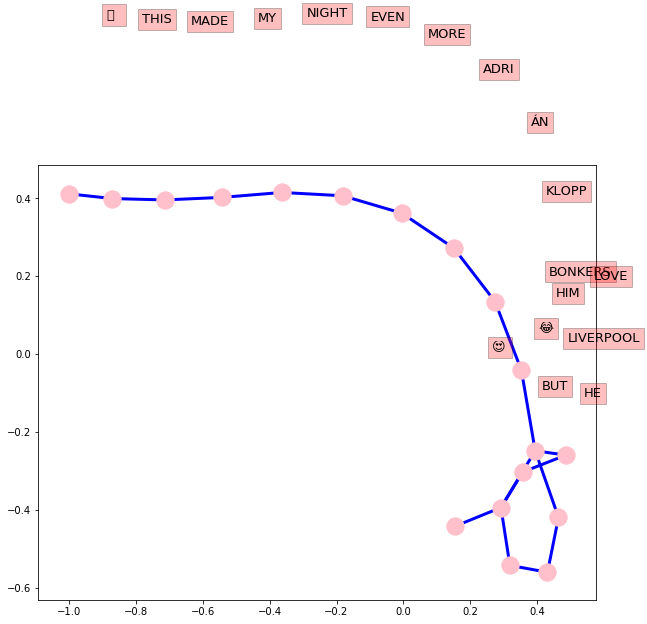

In [73]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
    
G.add_node("ADRI", weight=500)
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=1)

nx.draw_networkx(G, pos, font_size=16, width=3, edge_color='blue', node_color='pink', with_labels=False, ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+0.45
    ax.text(x, y, s=key, bbox=dict(facecolor='red', alpha=0.25), horizontalalignment='center', fontsize=13)
    
plt.show()